In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import pickle

In [5]:
balanced_data = pd.read_csv("floating_debris_data/balanced_data.csv")

In [6]:
balanced_data

,Location,Date,Sentinel-2,Longitude,Latitude,B1,B2,B3,B4,B5,...,GNDVI,MCARI,MSI,NDMI,NBR,NDSI,SAVI,OSI,PNDVI,label
0,Caribbean Sea,20161103,A,-86.422592,15.947693,0.022240,0.024286,0.022068,0.016566,0.012177,...,-0.261005,-0.002935,1.042256,-0.020691,0.007203,0.241619,-0.010295,1.590786,-0.659011,1
1,Gulf of Gera,20210626,B,26.528152,39.040215,0.016377,0.024589,0.036882,0.013402,0.011666,...,-0.226979,0.002654,1.103045,-0.048998,0.209766,0.179982,0.027489,2.044950,-0.526318,1
2,Gulf of Gera,20210626,B,26.522369,39.041180,0.015475,0.020442,0.020078,0.003485,0.001777,...,-0.227117,0.000157,0.505766,0.328228,0.332796,0.516818,0.026622,1.152688,-0.553553,1
3,Gulf of Gera,20210626,B,26.521099,39.041176,0.015464,0.023483,0.018375,0.002875,0.001410,...,-0.247050,0.000198,0.484931,0.346864,0.338666,0.547037,0.023987,0.904912,-0.602547,1
4,Gulf of Gera,20210626,B,26.525602,39.041553,0.013649,0.017143,0.019180,0.002774,0.001669,...,-0.161507,0.001002,0.543585,0.295685,0.316972,0.436354,0.032148,1.280645,-0.476946,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016,Vigo,20160920,A,-8.915445,42.251598,0.029624,0.032174,0.038470,0.027249,0.016418,...,-0.214001,-0.008173,0.513222,0.321683,0.408717,0.501182,-0.006362,2.042652,-0.594344,7
1017,Vigo,20160920,A,-8.910517,42.221783,0.044181,0.072709,0.077323,0.081960,0.072565,...,0.083595,-0.008552,0.258855,0.588745,0.684853,0.531298,0.021095,2.190691,-0.434608,7
1018,Vigo,20160920,A,-8.915609,42.218815,0.043746,0.035255,0.032423,0.021161,0.019840,...,-0.190539,0.001038,0.668802,0.198465,0.371848,0.374829,0.002439,1.519881,-0.602385,7
1019,Vigo,20160920,A,-8.868781,42.247772,0.021214,0.027700,0.026569,0.017046,0.013799,...,-0.287761,-0.001179,0.528384,0.308572,0.412850,0.547700,-0.006631,1.574519,-0.658297,7


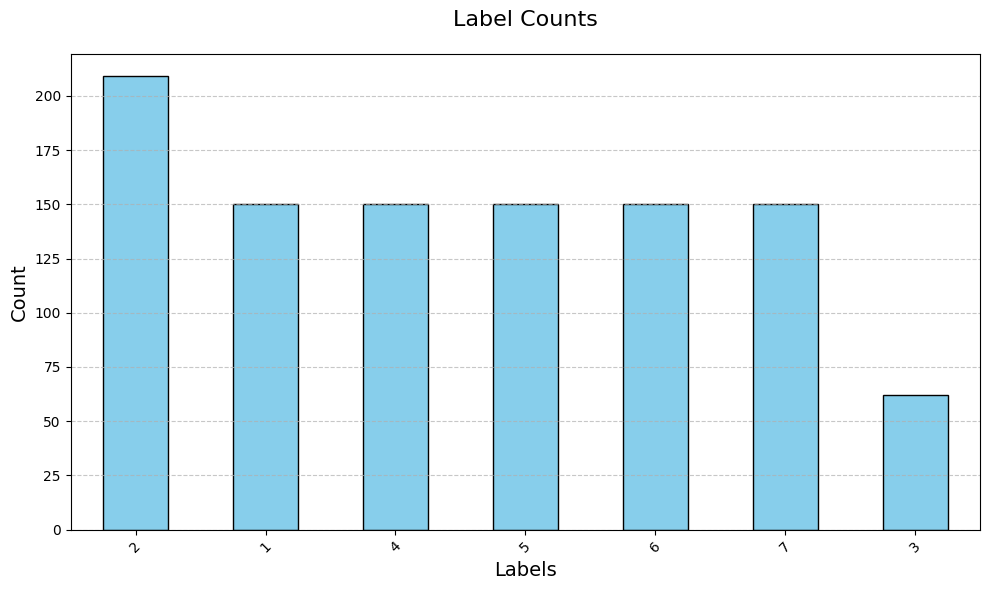

In [7]:
label_counts = balanced_data['label'].value_counts()
plt.figure(figsize=(10, 6))
label_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Label Counts', fontsize=16, pad=20)
plt.xlabel('Labels', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

The labels for this dataset are: 1 (water), 2 (plastic), 3 (driftwood), 4 (seaweed), 5 (pumice), 6 (sea snot), and 7 (sea foam).

In [8]:
label_mapping = {
    1: "water",
    2: "plastic",
    3: "driftwood",
    4: "seaweed",
    5: "pumice",
    6: "sea snot",
    7: "sea foam"
}

# Add a new column with true labels
balanced_data['true_label'] = balanced_data['label'].map(label_mapping)

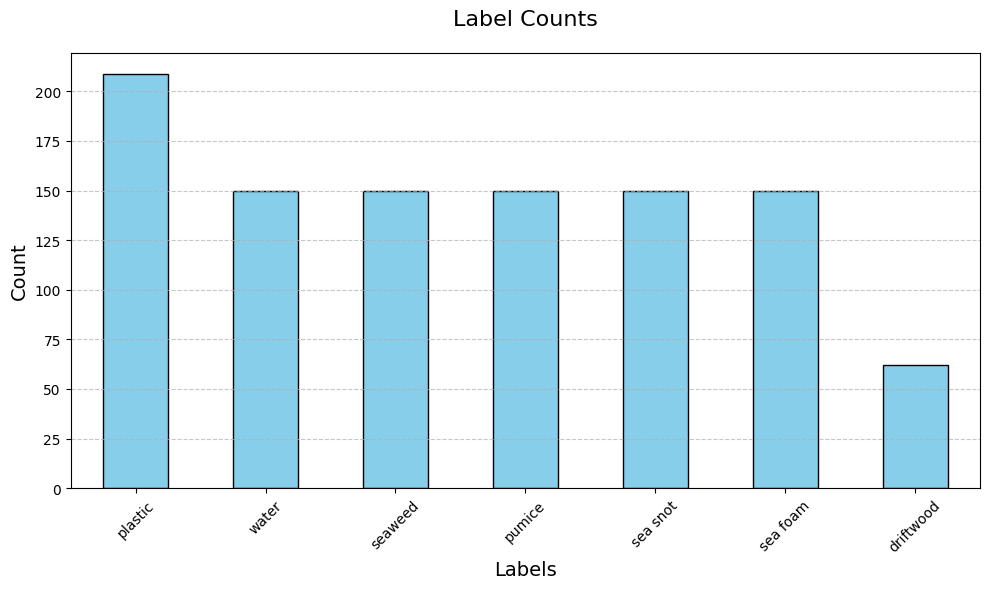

In [9]:
label_counts = balanced_data['true_label'].value_counts()
plt.figure(figsize=(10, 6))
label_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Label Counts', fontsize=16, pad=20)
plt.xlabel('Labels', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [10]:
balanced_data = balanced_data.drop(columns=['label'])

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [12]:
# band B1, band B8A, the NDSI, the MNDWI, the NDWI, the OSI, the FDI, the WRI, and the MARI. (from the paper)
features = balanced_data[['NDSI', 'MNDWI', 'NDWI', 'OSI']] # you can play with which features to include in the model here
target_y = balanced_data['true_label']

x_train, x_test, y_train, y_test = train_test_split(features, target_y, test_size = 0.3, random_state = 5)


model_balanced_decision_tree = DecisionTreeClassifier(random_state = 5)
model_balanced_decision_tree.fit(x_train, y_train) ## ^

DecisionTreeClassifier(random_state=5)

In [13]:
y_pred = model_balanced_decision_tree.predict(x_test) ## from modelv6

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Model: {accuracy:.2f}")

Accuracy of Model: 0.75


In [14]:
y_pred

array(['sea foam', 'seaweed', 'water', 'plastic', 'water', 'seaweed',
       'plastic', 'water', 'plastic', 'pumice', 'driftwood', 'driftwood',
       'seaweed', 'sea foam', 'seaweed', 'water', 'seaweed', 'pumice',
       'plastic', 'plastic', 'pumice', 'water', 'water', 'sea snot',
       'water', 'driftwood', 'seaweed', 'sea snot', 'driftwood', 'pumice',
       'water', 'plastic', 'sea foam', 'sea foam', 'pumice', 'sea snot',
       'pumice', 'sea foam', 'plastic', 'sea foam', 'pumice', 'sea foam',
       'seaweed', 'sea foam', 'seaweed', 'seaweed', 'sea foam', 'plastic',
       'seaweed', 'plastic', 'plastic', 'seaweed', 'sea snot', 'seaweed',
       'pumice', 'pumice', 'water', 'seaweed', 'plastic', 'sea foam',
       'sea snot', 'sea foam', 'seaweed', 'sea foam', 'pumice', 'plastic',
       'sea foam', 'sea foam', 'sea snot', 'pumice', 'sea foam',
       'sea foam', 'seaweed', 'plastic', 'plastic', 'seaweed', 'plastic',
       'seaweed', 'sea snot', 'sea foam', 'pumice', 'sea foam

In [15]:
print("y_train:", y_train.unique())
print("y_test:", y_test.unique())

y_train: ['water' 'sea foam' 'sea snot' 'pumice' 'plastic' 'seaweed' 'driftwood']
y_test: ['sea foam' 'seaweed' 'plastic' 'water' 'driftwood' 'pumice' 'sea snot']


In [16]:
cm = confusion_matrix(y_test, y_pred, labels=['water', 'plastic', 'driftwood', 'seaweed', 'pumice', 'sea snot', 'sea foam'])
cm

array([[27,  4,  0,  0,  1,  1,  2],
       [ 1, 38,  0,  0, 14,  4,  5],
       [ 0,  0, 15,  0,  0,  0,  0],
       [ 0,  0,  3, 51,  0,  0,  0],
       [ 0,  9,  0,  0, 30,  0,  6],
       [ 0,  2,  0,  0,  0, 37,  5],
       [ 7,  5,  0,  0,  4,  3, 33]])

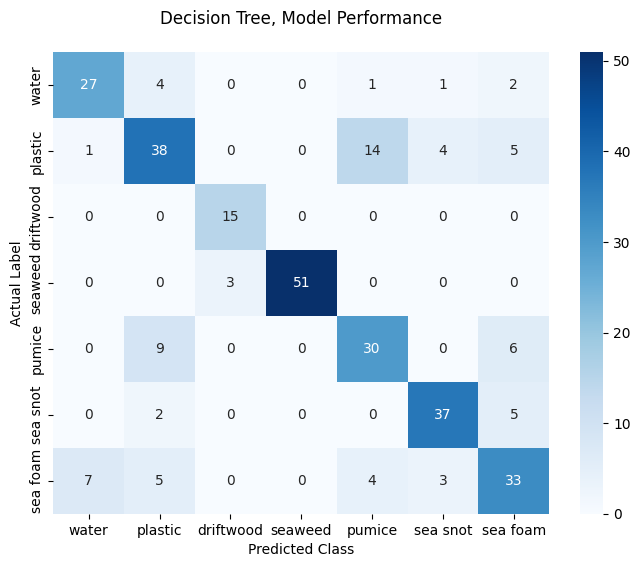

In [17]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
           xticklabels=['water', 'plastic', 'driftwood', 'seaweed', 'pumice', 'sea snot', 'sea foam'],
            yticklabels=['water', 'plastic', 'driftwood', 'seaweed', 'pumice', 'sea snot', 'sea foam'],
            annot_kws={"size": 10})  # Adjust font size here
plt.title('Decision Tree, Model Performance', pad=20)
plt.xlabel('Predicted Class')
plt.ylabel('Actual Label')
plt.show()

In [15]:
# Save the model to the 'models' folder
models_folder = "models"
os.makedirs(models_folder, exist_ok=True)
model_path = os.path.join(models_folder, "model_balanced_decision_tree.pkl")

with open(model_path, "wb") as model_file:
    pickle.dump(model_balanced_decision_tree, model_file)

print(f"Model saved successfully to {model_path}")

Model saved successfully to models/model_balanced_decision_tree.pkl


/opt/anaconda3/lib/python3.11/site-packages/sklearn/inspection/_plot/partial_dependence.py:972: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim([min_val, max_val])
/opt/anaconda3/lib/python3.11/site-packages/sklearn/inspection/_plot/partial_dependence.py:972: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim([min_val, max_val])


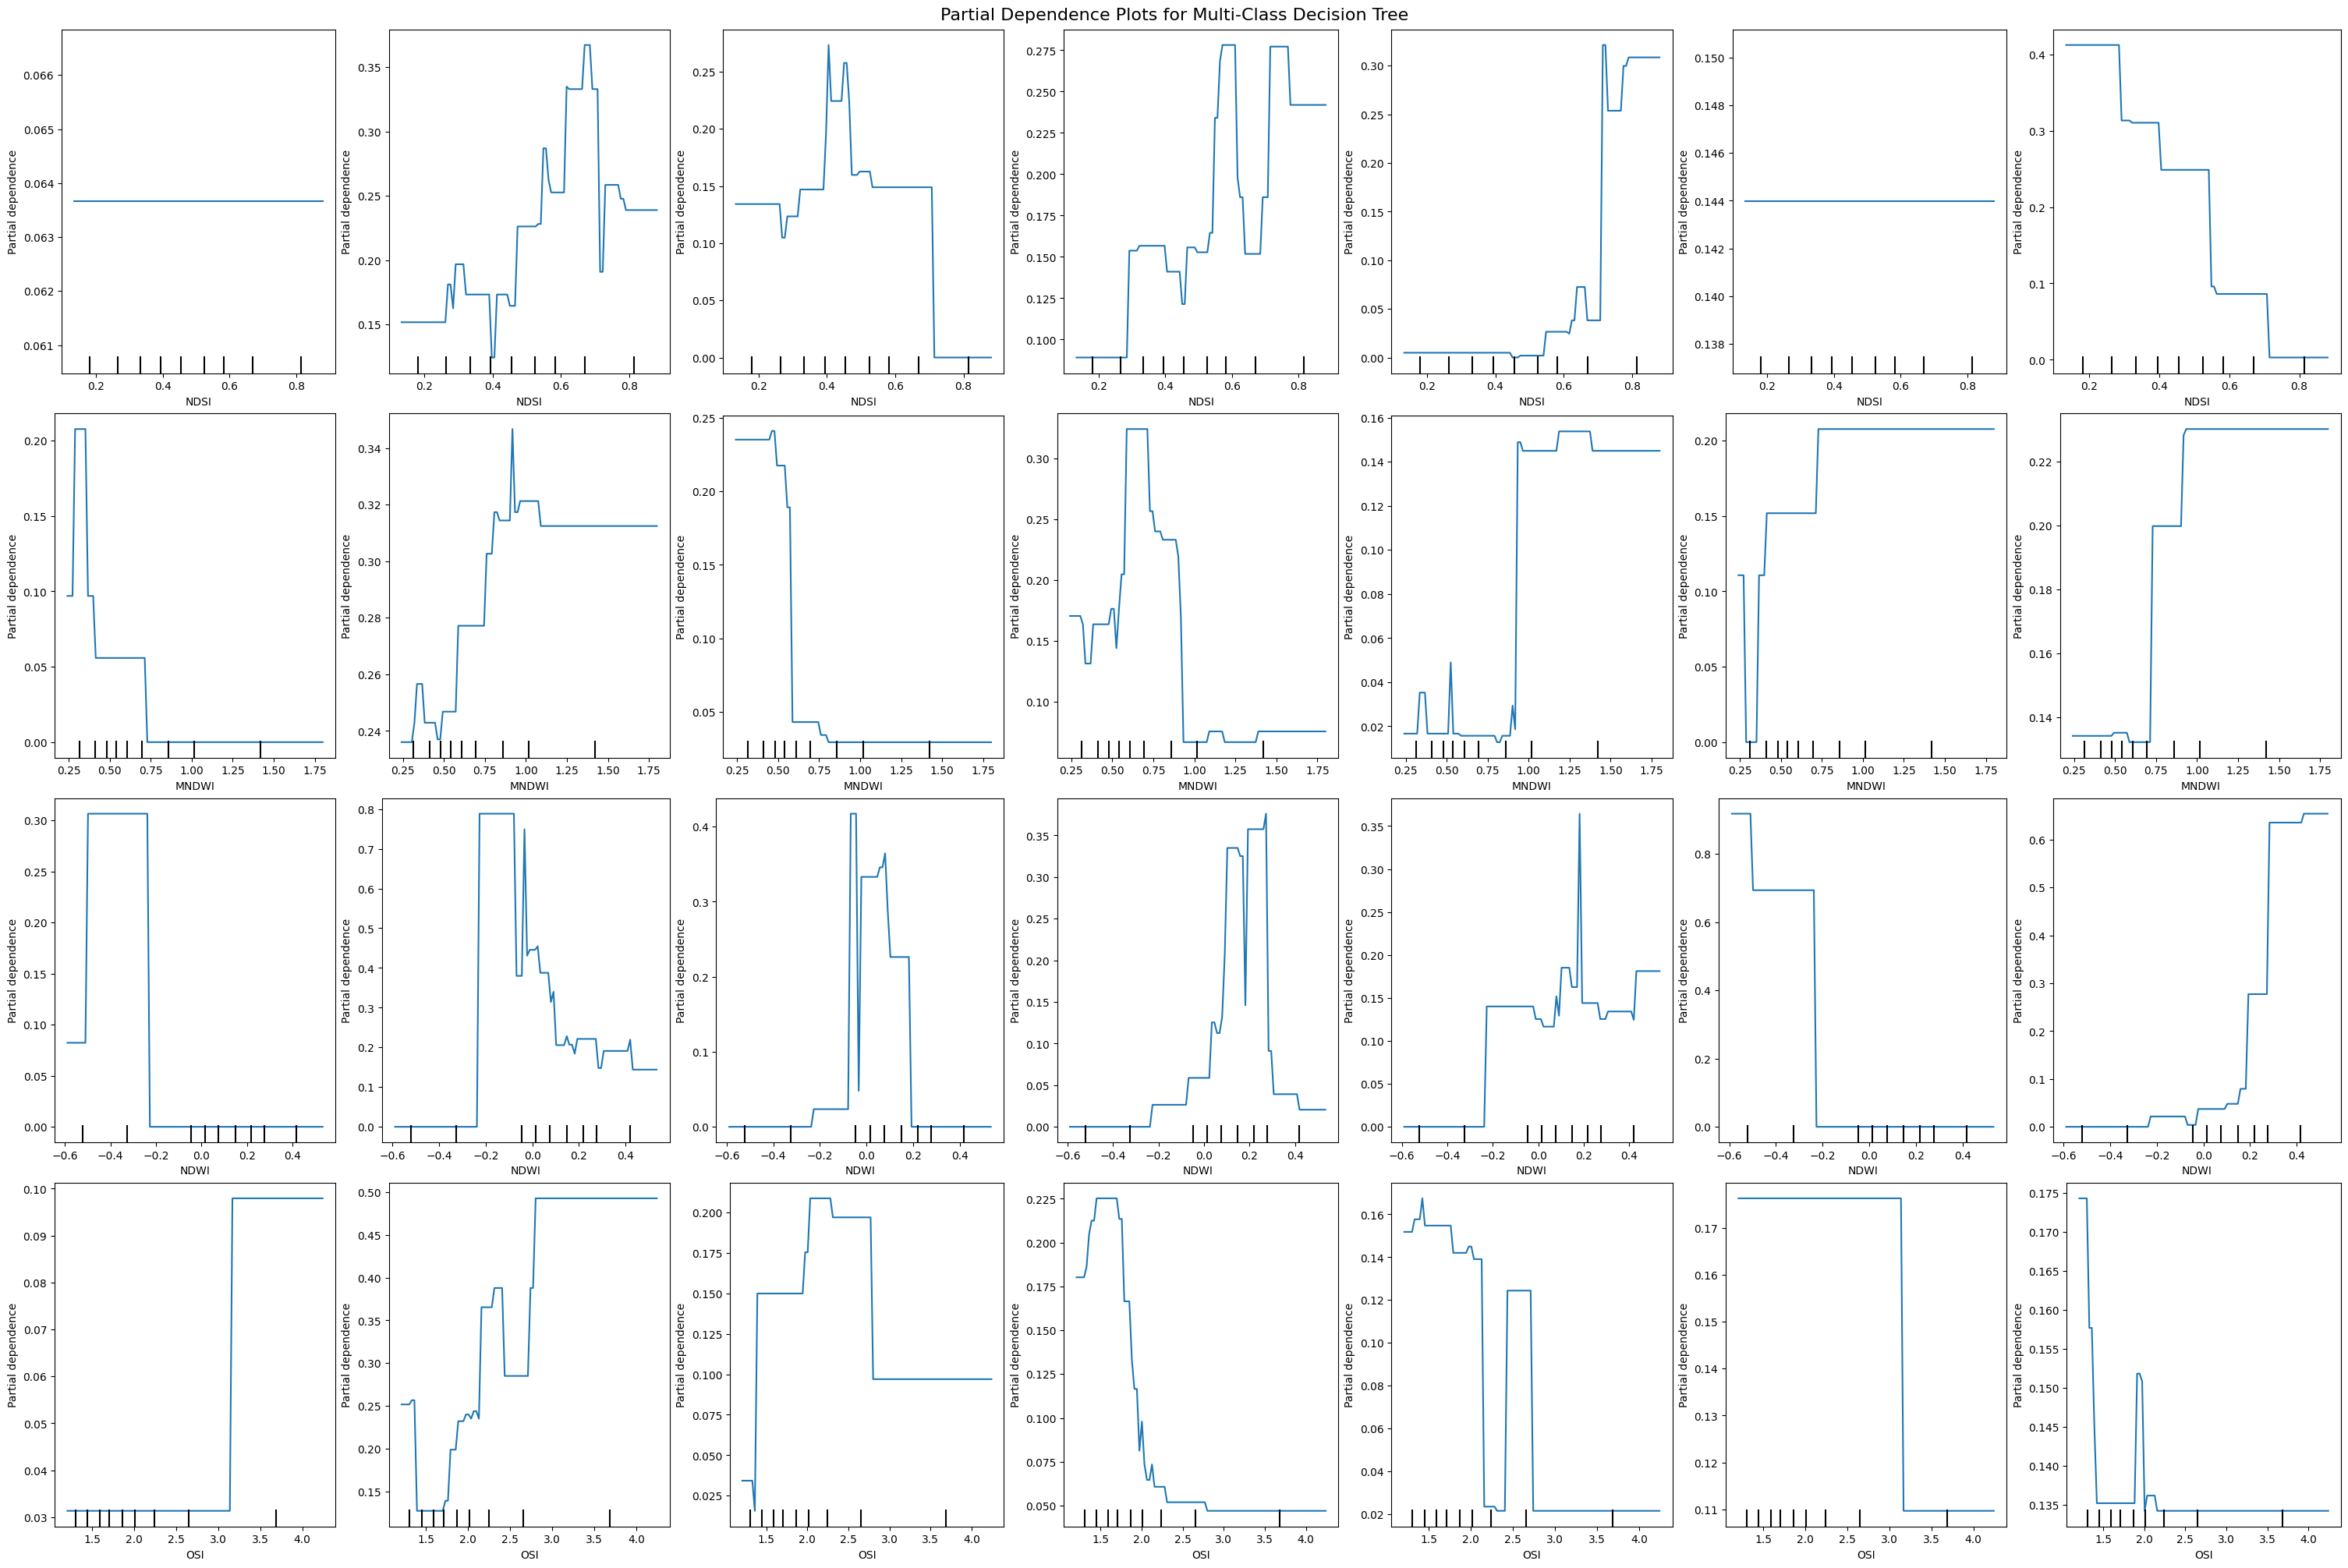

In [48]:
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay

# Define features and feature names
X = features  # Feature set
feature_names = X.columns.tolist()  # Extract feature names
classes = model_balanced_decision_tree.classes_  # List of target classes

# Define number of rows (features) and columns (classes) for the subplot grid
fig, axes = plt.subplots(len(feature_names), len(classes), figsize=(30, 20), constrained_layout=True)

# Loop over features and classes to generate PDPs
for i, feature in enumerate(feature_names):
    for j, class_label in enumerate(classes):
        ax = axes[i, j] if len(feature_names) > 1 else [axes[j]]  # Adjust for single feature case
        try:
            pd_display = PartialDependenceDisplay.from_estimator(
                model_balanced_decision_tree, 
                X, 
                features=[feature], 
                target=class_label, 
                ax=ax
            )
            #ax.set_title(f"Feature: {feature} | Class: {class_label}")
        except ValueError as e:
            print(f"Skipping feature '{feature}' for class '{class_label}': {e}")

# Fix suptitle issue by replacing `pad` with `y`
plt.suptitle("Partial Dependence Plots for Multi-Class Decision Tree", fontsize=16)

plt.show()


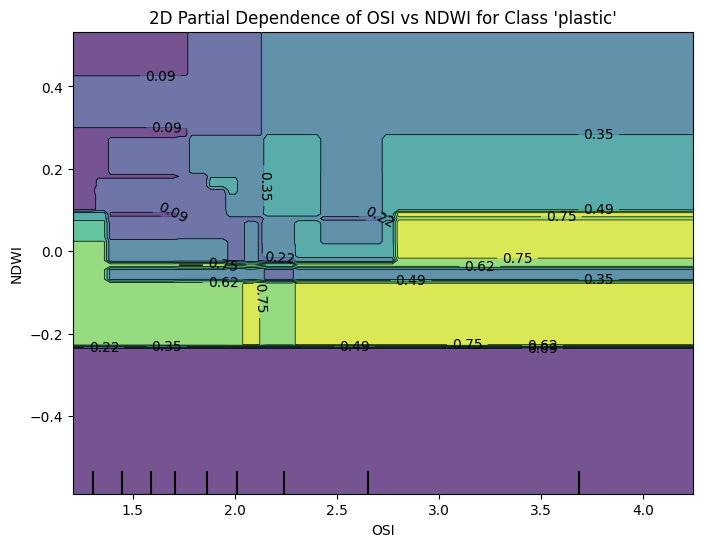

In [33]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.inspection import PartialDependenceDisplay

# Define the features for the 2D plot
features_to_plot = ("OSI", "NDWI")

# Select a valid class label from the model (e.g., "water", "plastic", etc.)
class_label = "plastic"  # Change this to another class if needed

# Generate the 2D Partial Dependence Plot
fig, ax = plt.subplots(figsize=(8, 6))

PartialDependenceDisplay.from_estimator(
    model_balanced_decision_tree,
    X, 
    features=[features_to_plot],  # Must be a list of a tuple for 2D PDP
    target=class_label,  # Use a class label instead of an index
    kind="average",
    ax=ax
)

ax.set_title(f"2D Partial Dependence of OSI vs NDWI for Class '{class_label}'")
plt.show()

